In [13]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [56]:
x = np.arange(n)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

In [57]:
n = 100
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])

In [58]:
if __name__ == '__main__':

    class C_Means():
        def __init__(self, dataset, fuzzy_c=2, count_clusters=3, cut_param=.9):
            self.dataset = dataset
            self.count_clusters = count_clusters
            self.fuzzy_c = fuzzy_c
            self.cut_param = cut_param
            self.max_iter_num = 100
            self.tolerance = .01
            self.dist = np.zeros((self.dataset.shape[0], self.count_clusters))
            self.centroids = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for i in range(self.count_clusters)])
            self.u = np.array([[np.random.uniform(0, 1) for i in range(self.count_clusters)]        
            for j in range(self.dataset.shape[0])])
            self.clusters = np.array([])
        
        def dist2(self, list1, list2):
            return sum((i - j) ** 2 for i, j in zip(list1, list2))
       
        def distribute_data(self):
            self.dist = np.array([[self.dist2(i, j) for i in self.centroids] for j in self.dataset])
            self.u = (1 / self.dist) ** (1 / (self.fuzzy_c - 1))
            self.update_array()
            self.u = (self.u / self.u.sum(axis=1)[:, None])
            
        def update_array(self):
            arr = np.where(np.isinf(self.u))
            for i in range(0, len(arr[0])):
                self.u[arr[0][i]] = 0
                self.u[arr[0][i]][arr[1][i]] = 1
                
        def find_centroids(self):
            self.centroids = (self.u.T).dot(self.dataset) / self.u.sum(axis=0)[:, None]
            
        def fit(self):
            iter = 1
            while iter < self.max_iter_num:
                prev_centroids = np.copy(self.centroids)
                self.find_centroids()
                self.distribute_data()
                if max([self.dist2(i, k) for i, k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                    break
                iter += 1
                
        def find_clusters(self):
            clusters = np.array([])
            for i in range(len(self.u)):
                
                i_max = self.u[i][0]
                i_max_indx = 0
                for j in range(len(self.u[i])):
                    if (self.u[i][j] > i_max):
                        i_max = self.u[i][j]
                        i_max_indx = j
                if (i_max > self.cut_param):
                    clusters = np.append(list(clusters), i_max_indx + 1).astype(int)
                else:
                    clusters = np.append(list(clusters), 0).astype(int)
            return clusters

In [59]:
test = C_Means(dataset,2 ,3 , .5)
test.fit()
clusters = test.find_clusters()

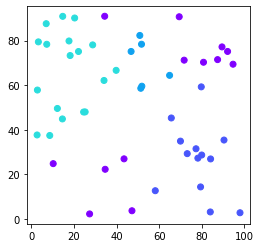

In [60]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[clusters])
plt.show()